$Dist(x_1, x_2)=\sqrt{(f(x_1) - g(x_2))^2 + (x_1 - x_2)^2}$,  
  
где $f()$ и $g()$ - функции, между графиками которых мы ищем расстояние
  
Минимальное расстояние $ = min(Dist())$

In [275]:
# visualization
import pylab
from matplotlib import mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [276]:
# math
from scipy.optimize import fmin
import numpy as np

In [277]:
# functions for plotting
def plot_functions():
    xmin = -10.0
    xmax = 10.0
    dx = 0.01
    dy = 0.01
    xlist = mlab.frange(xmin, xmax, dx)
    ylist = [function_a (x) for x in xlist]

    xlist2 = mlab.frange (xmin, xmax, dx)
    ylist2 = [function_b(x) for x in xlist2]
    pylab.figure(figsize=(5, 5))
    pylab.plot (xlist, ylist)
    pylab.plot (xlist2, ylist2)

    pylab.title('Функции')
    pylab.legend(['f(x)', 'g(x)'])
    pylab.xlim(-20, 20)
    pylab.ylim(-20, 20)
    pylab.gca().set_aspect('equal', adjustable='box')
    pylab.show()
    
    
def plot_result(xmin, xmax, ymin, ymax):
    %matplotlib notebook
    import warnings
    warnings.filterwarnings("ignore")

    dx = 0.001
    xlist = mlab.frange (xmin, xmax, dx)
    ylist = [function_a (x) for x in xlist]

    xlist2 = mlab.frange (xmin, xmax, dx)
    ylist2 = [function_b (x) for x in xlist2]

    figsize = 5
    pylab.figure(figsize=(figsize, figsize))
    pylab.plot (xlist, ylist)
    pylab.plot (xlist2, ylist2)
    pylab.plot([min_args[0], min_args[1]], [function_a(min_args[0]), function_b(min_args[1])], color='r', alpha=0.7)


    pylab.xlim(xmin, xmax)
    pylab.ylim(ymin, ymax)
    pylab.gca().set_aspect('equal', adjustable='box')

    pylab.title('Результат')
    pylab.legend(['f(x)', 'g(x)', 'Min расстояние'], loc='upper right')
    pylab.show()
    
    
def plot_dist_func(Axes3D, alpha):
    def makeData():
        x = np.arange (-5, 5, 0.05)
        y = np.arange (-5, 5, 0.05)
        xgrid, ygrid = np.meshgrid(x, y)
        zgrid = distance([xgrid, ygrid])
        return xgrid, ygrid, zgrid

    xt, yt, zt = makeData()

    Axes3D = Axes3D
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plt.title('Функция расстояния')
    ax.plot_surface(xt, yt, zt, cmap=cm.Spectral, alpha=alpha)
    ax.scatter(min_args[0], min_args[1], min_dist)
    plt.show()

In [278]:
# input math functions
def function_a(x):
    return np.sin(x**2) * 3


def function_b(x):
    return x**2 - 2*x + 10

<IPython.core.display.Javascript object>


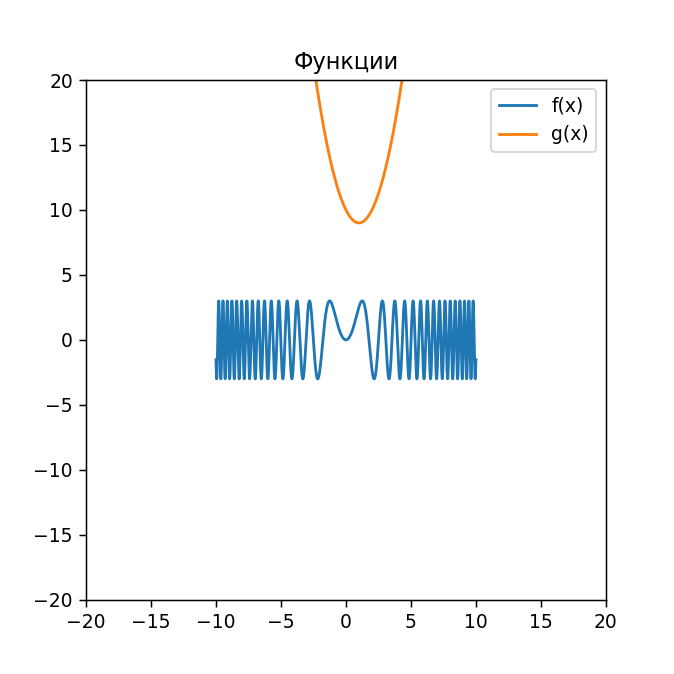

In [279]:
%matplotlib notebook
plot_functions()

In [280]:
def distance(arguments):
    x = arguments[0]
    y = arguments[1]
    return ((function_b(y) - function_a(x))**2 + (y - x)**2)**0.5

In [281]:
min_args = fmin(distance, [0, 0], maxiter=1000)
print()
if abs(function_a(min_args[0]) - function_b(min_args[1])) < 0.0001:
    min_dist = 0
    print('FUNCTIONS INTERSECT')
else:
    min_dist = distance(min_args)
print('MINIMUM ARGS:', min_args)
print('MINIMUM DISTANCE:', min_dist)

Optimization terminated successfully.
         Current function value: 6.004894
         Iterations: 63
         Function evaluations: 126

MINIMUM ARGS: [1.25126577 1.01931686]
MINIMUM DISTANCE: 6.00489399727978


<IPython.core.display.Javascript object>


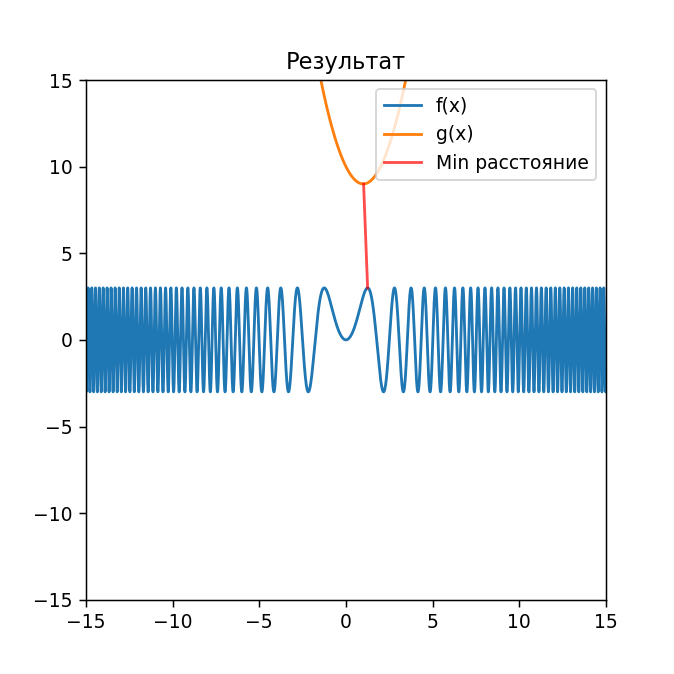

In [282]:
%matplotlib notebook
plot_result(xmin=-15, xmax=15, ymin=-15, ymax=15)

<IPython.core.display.Javascript object>


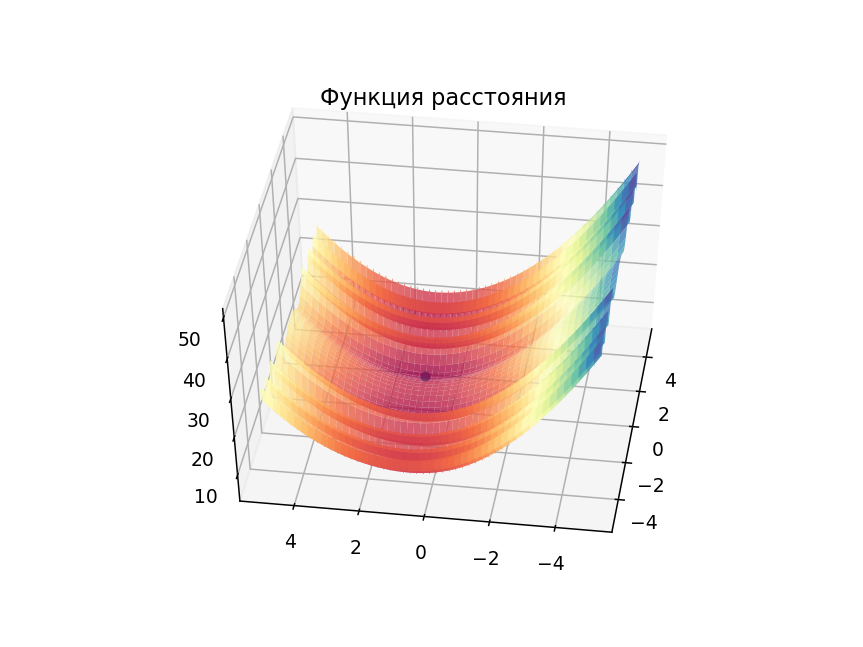

In [75]:
%matplotlib notebook
plot_dist_func(Axes3D=Axes3D, alpha=0.8)

# 3d Version

In [522]:
def function_a(a):
    x = a[0]
    y = a[1]
    return -0.01*(x**2 + y**2) - 40

In [523]:
def function_b(a):
    x = a[0]
    y = a[1]
    return 0.01*((x+30)**2 + y**2)

<IPython.core.display.Javascript object>


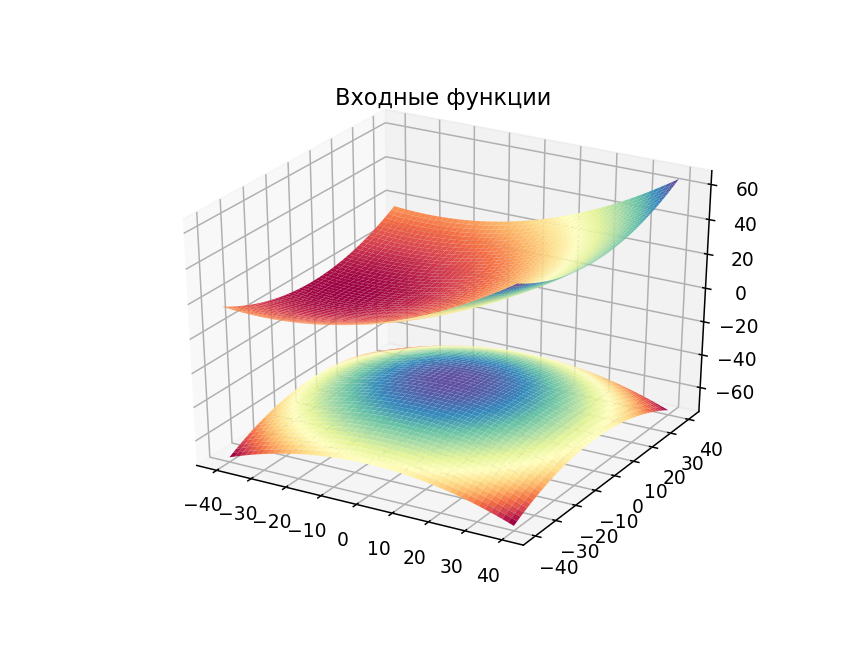

In [524]:
def makeData(f):
    x = np.arange (-40, 40, 0.05)
    y = np.arange (-40, 40, 0.05)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid = f([xgrid, ygrid])
    return xgrid, ygrid, zgrid

xt, yt, zt = makeData(function_a)

Axes3D = Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title('Входные функции')
ax.plot_surface(xt, yt, zt, cmap=cm.Spectral, alpha=1)
xt, yt, zt = makeData(function_b)

ax.plot_surface(xt, yt, zt, cmap=cm.Spectral, alpha=1)
plt.show()

In [480]:
def distance(arguments):
    x_a = arguments[0]
    x_b = arguments[1]
    y_a = arguments[2]
    y_b = arguments[3]
    return ((function_b([x_b, y_b]) - function_a([x_a, y_a]))**2 + (x_a - x_b)**2 + (y_a - y_b)**2)**0.5

In [511]:
min_args = fmin(distance, [-2, 1, 1, 1], maxiter=1000)

Optimization terminated successfully.
         Current function value: 43.153786
         Iterations: 220
         Function evaluations: 377


In [512]:
x_a, x_b, y_a, y_b = min_args

In [513]:
x_a, x_b, y_a, y_b

(-10.54669054022244,
 -19.45333212765067,
 -3.064740181928765e-05,
 -3.0186546477166025e-05)

In [514]:
z_a = function_a([x_a, y_a])
z_b = function_b([x_b, y_b])

<IPython.core.display.Javascript object>


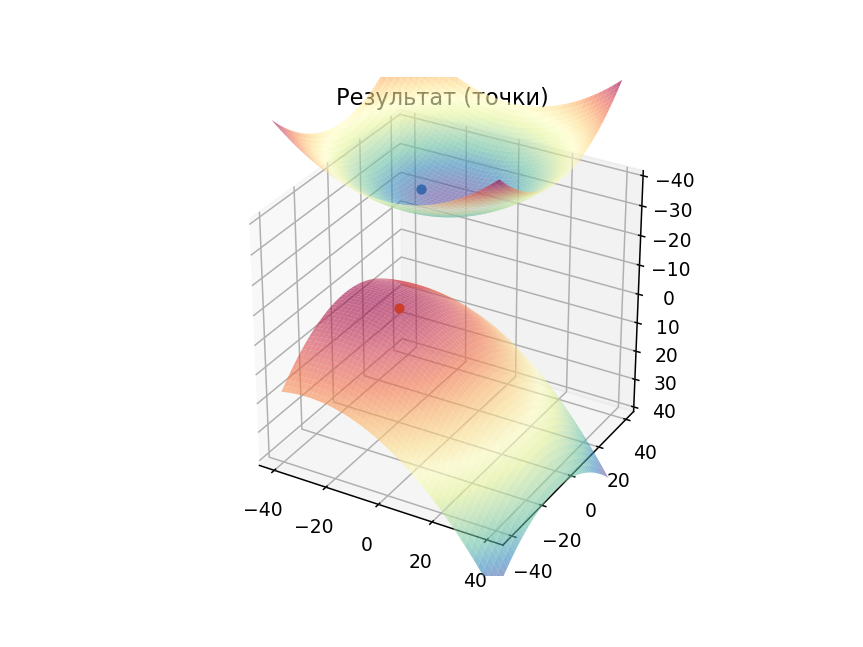

In [516]:
def makeData(f):
    x = np.arange (-40, 40, 0.05)
    y = np.arange (-40, 40, 0.05)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid = f([xgrid, ygrid])
    return xgrid, ygrid, zgrid

xt, yt, zt = makeData(function_a)

Axes3D = Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title('Результат (точки)')
ax.plot_surface(xt, yt, zt, cmap=cm.Spectral, alpha=0.6)
xt, yt, zt = makeData(function_b)

ax.set_zlim(40)
ax.set_aspect('equal', adjustable='box')
ax.plot_surface(xt, yt, zt, cmap=cm.Spectral, alpha=0.6)
ax.scatter(x_a, y_a, z_a)
ax.scatter(x_b, y_b, z_b)
plt.show()

In [518]:
def get_linear(x_a, y_a, z_a, x_b, y_b, z_b):
    plus = False if x_a > x_b else True
    x, y = x_a, y_a
    k = ((y_b - y_a) / (x_b - x_a))
    pairs = []
    while abs(x) < abs(x_b):
        if plus:
            x += 0.01
            y += k * 0.01
        else:
            x -= 0.01
            y -= k * 0.01
        pairs.append([x, y])
    delta_z = (z_b - z_a)
    step = len(pairs)
    dz = delta_z / step
    z = z_a
    xyz_lists = []
    for pair in pairs:
        x, y = pair
        z += dz
        xyz_lists.append([x, y, z])
    return xyz_lists

In [519]:
linear = get_linear(x_a, y_a, z_a, x_b, y_b, z_b)

In [520]:
bool(linear)

True

<IPython.core.display.Javascript object>


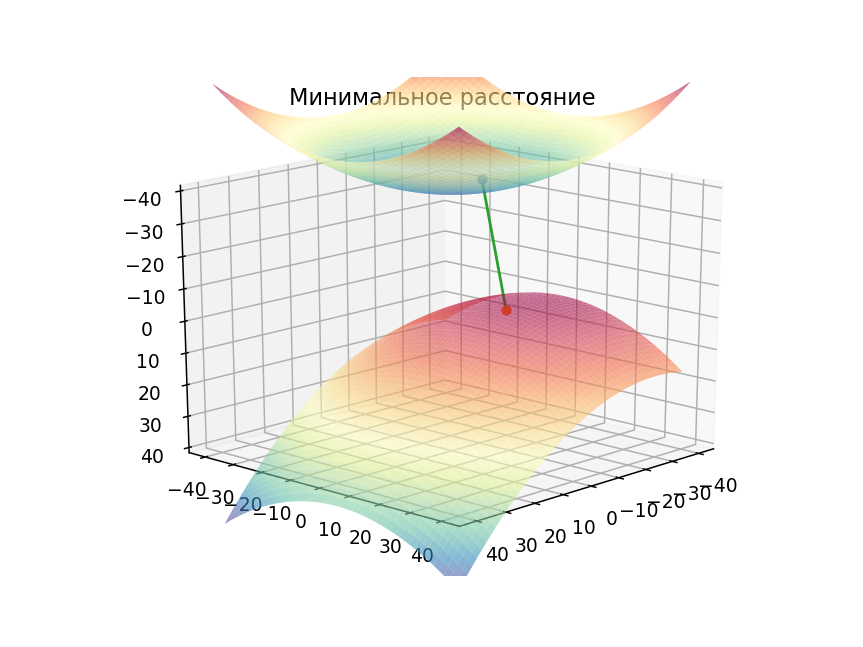

In [521]:
xt, yt, zt = makeData(function_a)

Axes3D = Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title('Минимальное расстояние')
ax.plot_surface(xt, yt, zt, cmap=cm.Spectral, alpha=0.6)
xt, yt, zt = makeData(function_b)

ax.set_zlim(40)

ax.plot_surface(xt, yt, zt, cmap=cm.Spectral, alpha=0.6)
ax.scatter(x_a, y_a, z_a)
ax.scatter(x_b, y_b, z_b)
ax.plot([i[0] for i in linear], [i[1] for i in linear], [i[2] for i in linear])

plt.show()